In [1]:
import gym
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from gym import Env
from gym.spaces import Discrete, Box
import numpy as np
import random
import os
import numpy as np 
from numpy import abs as Abs
from numpy import sign as sign
from numpy import sqrt,pi,array

from control.matlab import *  # MATLAB-like functions
import control as ct
from scipy import signal
 
 
import matplotlib
import matplotlib.pyplot as plt
 
import tensorflow as tf
from gym import Env
from gym.spaces import Discrete, Box
 
import random
 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam

In [3]:
n = 8
r = 3
M = np.load('M.npy')
C = np.load('C.npy')
K = np.load('K.npy')
Ad = np.load('Ad.npy')
Bd = np.load('Bd.npy')
Ed = np.load('Ed.npy')
Cd = np.load('Cd.npy')
Dd = np.load('Dd.npy')
from numpy.linalg import matrix_rank
ko = matrix_rank(ctrb(Ad, Bd))
if ko == len(Ad):
  print("System is controllable")
else:
  print("System is uncontrollable")

System is controllable


In [4]:
# GMdt = np.loadtxt('GMdt.txt', unpack = True)
# print(len(GMdt))
# a = np.random.randint(low=1,high=20)

# if a < 10:
#     f = "la"+"%02d" % a  + ".dat"
# else:
#     f = "la"+"%02d" % a  + ".dat"
# print(f)
# c = (np.array(np.loadtxt(f)).flatten())/100
# print(c)

# # Time series for ground motion
# dt = GMdt[a-1]
# print(dt)
# tend = dt*len(c)
# t = np.arange(0, tend, dt)
# plt.figure()
# plt.plot(t,c)

In [5]:
# Weighting matrices
Q = np.identity(2*n)
# Q = np.zeros([2*n, 2*n])
# Q[0:n, 0:n] = K
# Q[n:2*n, n:2*n] = M
(i,j) = Bd.shape
R =  (10**(-14))*np.identity(j)
del i, j
Kp, Sp, ep = ct.dlqr(Ad, Bd, Q, R)

GMdt = np.loadtxt('GMdt.txt', unpack = True)
#print(len(GMdt))
# Time series analysis
xo = np.zeros((4000,2*n,10))
(i,j) = Cd.shape
yo = np.zeros((4000,i,10))
xp = np.zeros((4000,2*n,10))
(i,j) = Cd.shape
yp = np.zeros((4000,i,10))
J1_val = np.zeros([10, 1])
J2_val = np.zeros([10, 1])
U = np.zeros([4000, r, 10])
del i,j
for i in range(1, 11):
    if i < 10:
        f = "la"+"%02d" % i  + ".dat"
    else:
        f = "la"+"%02d" % i  + ".dat"
    print(f)
    xacc = (np.array(np.loadtxt(f)).flatten())/100
    # Time series for ground motion
    dt = GMdt[i-1]
    print(dt)
    tend = dt*len(xacc)
    t = np.arange(0, tend, dt)
    #plt.figure()
    #plt.plot(t,xacc)

    for tkk in range(0,len(t)-1):
        time_current = t[tkk]
        y = (Cd @ np.array([xo[tkk,:,i-1]]).T)
        yo[tkk,:,i-1] = y.T
        x = (Ad @ np.array([xo[tkk,:,i-1]]).T) + (Ed * xacc[tkk])
        xo[tkk+1,:,i-1] = x.T
        y1 = (Cd @ np.array([xp[tkk,:,i-1]]).T) + (Dd @ ((-1*Kp) @ np.array([xp[tkk,:,i-1]]).T))
        yp[tkk,:,i-1] = y1.T
        u = (-1*Kp) @ np.array([xp[tkk,:,i-1]]).T
        #print(u)
        U[tkk, :, i-1] = u.T
        x1 = (Ad @ np.array([xp[tkk,:,i-1]]).T) + (Bd @ ((-1*Kp) @ np.array([xp[tkk,:,i-1]]).T)) + (Ed * xacc[tkk])
        xp[tkk+1,:,i-1] = x1.T
        
        En1 = 0.5*((xo[tkk+1,:,i-1]@Q)@xo[tkk+1,:,i-1].T)
        En2 = 0.5*((xp[tkk+1,:,i-1]@Q)@xp[tkk+1,:,i-1].T)
        J1 = dt*En1
        J2 = dt*En2
        J1_val[i-1] += J1 
        J2_val[i-1] += J2
print(J1_val, J2_val) 

la01.dat
0.02
la02.dat
0.02
la03.dat
0.01
la04.dat
0.01
la05.dat
0.01
la06.dat
0.01
la07.dat
0.02
la08.dat
0.02
la09.dat
0.02
la10.dat
0.02
[[28.71038861]
 [ 6.3833381 ]
 [17.07689431]
 [ 6.61271192]
 [ 3.12240593]
 [ 1.69320704]
 [ 6.13396419]
 [ 2.64840048]
 [20.00917642]
 [ 3.45692565]] [[1.10195739]
 [0.9118723 ]
 [0.79025596]
 [0.41580607]
 [0.36100668]
 [0.34328642]
 [0.58049981]
 [0.5181395 ]
 [1.41726984]
 [0.72252399]]


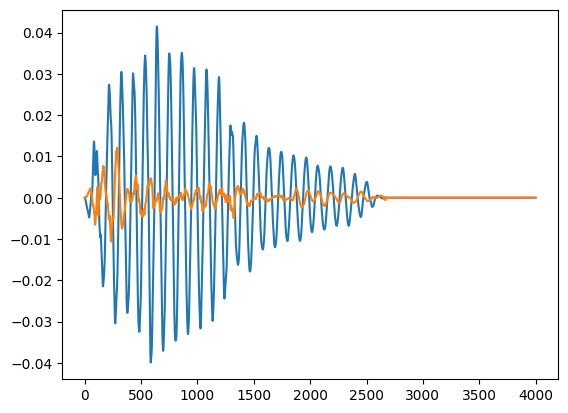

In [6]:
plt.plot(xo[:,0,0])
plt.plot(xp[:,0,1])

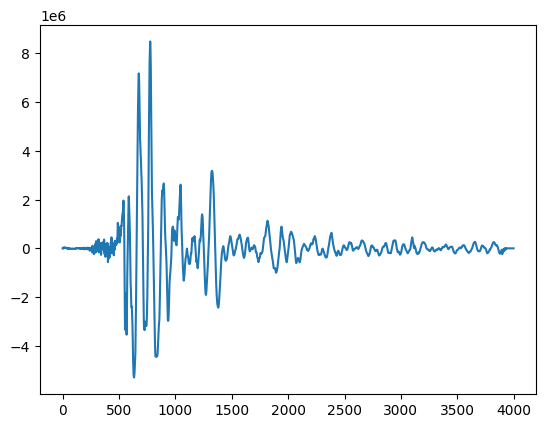

In [7]:
plt.plot(U[:,0,2])

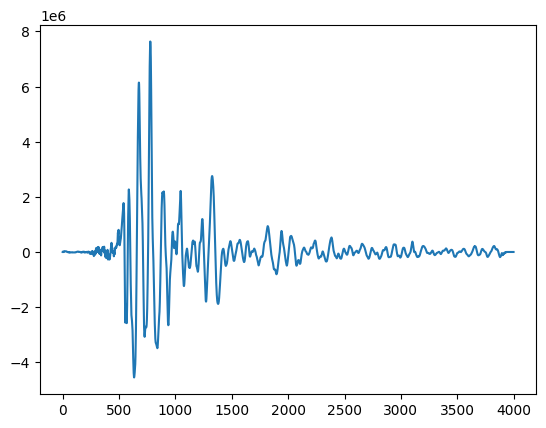

In [8]:
plt.plot(U[:,1,2])

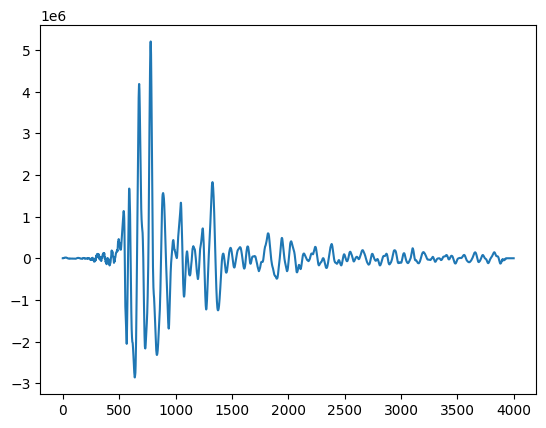

In [9]:
plt.plot(U[:,2,2])

In [10]:
# sr = 1/dt  # sampling frequency
# N1 = 2048  # Number of samples
# fstep = sr/N1  # freq interval
# f = np.linspace(0, (N1-1)*fstep, N1)

# # Perform FFT
# X = np.fft.fft(c)
# X_mag = np.abs(X)/N1

# f_plot = f[0:int(N1/2+1)]/(2 * np.pi)
# X_mag_plot = 2*X_mag[0:int(N1/2+1)]
# X_mag_plot[0] = X_mag_plot[0] / 2 # DC component does not need to multiply by 2

# # Plot 
# fig, ax1 = plt.subplots(nrows=1, ncols=1)
# ax1.plot(f_plot, X_mag_plot, '.-')
# ax1.set_xlabel('Freq (Hz)')
# ax1.set_ylabel('FFT Amplitude |X(freq)|')
# ax1.semilogx()
# ax1.set_xlim(0, 100)
# plt.show()

In [11]:
class MrDamperEnv(Env):

    def __init__(self):
    
      self.n = 8    # Number of storey
      self.r = 3    # no of MR dampers
      # 1000kN MR damper
      self.vmax = 10
      self.vmin = 0
      self.gamma = 141
      self.beta = 141
      self.Ad = 2074.5
      self.nd = 2
      self.eta = 100
      self.alpha0 = 26.0*10**3
      self.alpha1 = 29.1*10**3
      self.c01 = 105.4*10**3
      self.c02 = 131.6*10**3
      self.k01 = 0
      self.k02 = 0
      
      # Plant matrices
      self.M = np.load('M.npy')
      self.C = np.load('C.npy')
      self.K = np.load('K.npy')
      self.A = np.load('Ad.npy')
      self.B = np.load('Bd.npy')
      self.E = np.load('Ed.npy')
      
      # Output matrix (Disp + Accel)
      #self.Cd = np.array([[1, 1, 0, 0], [-self.Ks/self.M, self.Ks/self.M, 0, 0], [self.Ks/self.m, -1*(self.Ks+self.Kt)/self.m, 0, 0]])
      #self.Dd = np.array([[0, 1/self.M, -1/self.m]]).T
      #self.Ed = np.array([[0, 0, 0]]).T
    
      # Weighting matrices
      self.Q = np.identity(2*self.n)
      #self.Q = np.zeros([2*self.n, 2*self.n])
      #self.Q[0:self.n, 0:self.n] = self.K
      #self.Q[self.n:2*self.n, self.n:2*self.n] = self.M
      (i,j) = self.B.shape
      self.R =  (10**(-14))*np.identity(j)
      del i, j
        
      # Input per episode
      a = np.random.randint(low=1,high=10)

      if a < 10:
        f = "la"+"%02d" % a  + ".dat"
      else:
        f = "la"+"%02d" % a  + ".dat"
      print(f)
      self.xacc = (np.array(np.loadtxt(f)).flatten())/100  # Convert cm/s2 to m/s2
      #print(c)
      
      # Time series for ground motion
      GMdt = np.loadtxt('GMdt.txt', unpack = True)
      #print(len(GMdt))
      self.dt = GMdt[a-1]
      #print(self.dt)
      tend = self.dt*len(self.xacc)
      self.t = np.arange(0, tend, self.dt)
      nt = self.t.size
      #plt.figure()
      #plt.plot(self.t, self.xacc)
      del a, f, GMdt, tend   
      
          
      # Initialize variables
      self.time_current = 0
      self.state = np.zeros([nt, 2*self.n]) # states (ys,ysdot,yt,ytdot)
      self.U = np.zeros([nt, self.r]) # Control force (action)
      self.Re = np.zeros([nt, 1]) # Reward
      self.J_val = 0
      self.action_space = Box(low=np.array([-6e6, -6e6, -6e6]), high=np.array([6e6, 6e6, 6e6]),shape=(3,))
      self.observation_space = Box(low=np.array([-100000, -100000, -100000, -100000, -100000, -100000, -100000, -100000, -100000, -100000, -100000, -100000, -100000, -100000, -100000, -100000, -100000, -100000, -100000, -100000]), high=np.array([100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000]) )
      self.statem = np.zeros([1, 2*self.n])
      self.stateh = np.zeros([1, 2*self.n+1+self.r])
      self.hr = []

    def step(self, action):
          tim = self.time_current  # current time (size 1)
          # Control action
          #print(action)
          self.U[tim, :] = np.squeeze(action)    # control force
          #self.U[tim, 1] = np.squeeze(action)    # control force (floor 4)
          #self.U[tim, 2] = np.squeeze(action)    # control force (floor 6)
          
          action1 = np.array([self.U[tim, :]]).T
          state = np.array([self.state[tim, :]]).T
          #print(action1)
          #print(tim, self.U[tim, :], self.state[tim, :], self.Re[tim, :])
          
          # System model in discrete time
          A = self.A 
          B = self.B
          E = self.E
          Q = self.Q
          R = self.R  
          n = self.n
          r = self.r
          dt = self.dt
        
          self.J = 0
          self.J1 = 0
          z = 10 + tim
          i = 0
          for tkk in range(tim, z):
            h = self.xacc[tkk] 
            self.hr.append(h)
            xn = state
            #print(xn)
            xn1 = (A @ xn) + (B @ action1) + (E*h)
            state = xn1
            # Adaptive weights
            self.En1 = 0.5*((state.T@Q)@state)
            self.En2 = 0.5*((action1.T@R)@action1)
            alpha1 = self.En1/(self.En1+self.En2)
            alpha2 = self.En2/(self.En1+self.En2)
            self.En = (alpha1*self.En1) + (alpha2*self.En2)
            #print(self.E)
            self.J = self.J + dt*(0.9**i)*(self.En)
            self.J1 = self.J1 + dt*(0.9**i)*(self.En1)
            
            if(i==0):
              self.statem = state.T
              self.stateh[0, 0:2*self.n] = state.T
              self.stateh[0, 2*self.n:2*self.n+1] = h
              self.stateh[0, 2*self.n+1:2*self.n+1+self.r] = action1.T
              self.J_val += self.J1 
            i = i+1
          #print("kkk ",self.J_val)
          #print(self.J) 
          done = False
          #print(f1)
          info = {}   
          reward = -1*self.J
          self.Re[tim+1, :] = reward
          self.state[tim+1, :] = self.statem
          #print(self.stateh[0])
          return self.stateh[0], reward, done, info

    def reset(self):
      self.n = 8    # Number of storey
      self.r = 3    # no of MR dampers
      # 1000kN MR damper
      self.vmax = 10
      self.vmin = 0
      self.gamma = 141
      self.beta = 141
      self.Ad = 2074.5
      self.nd = 2
      self.eta = 100
      self.alpha0 = 26.0*10**3
      self.alpha1 = 29.1*10**3
      self.c01 = 105.4*10**3
      self.c02 = 131.6*10**3
      self.k01 = 0
      self.k02 = 0
      
      # Plant matrices
      self.M = np.load('M.npy')
      self.C = np.load('C.npy')
      self.K = np.load('K.npy')
      self.A = np.load('Ad.npy')
      self.B = np.load('Bd.npy')
      self.E = np.load('Ed.npy')
      
      # Output matrix (Disp + Accel)
      #self.Cd = np.array([[1, 1, 0, 0], [-self.Ks/self.M, self.Ks/self.M, 0, 0], [self.Ks/self.m, -1*(self.Ks+self.Kt)/self.m, 0, 0]])
      #self.Dd = np.array([[0, 1/self.M, -1/self.m]]).T
      #self.Ed = np.array([[0, 0, 0]]).T
    
      # Weighting matrices
      self.Q = np.identity(2*self.n)
      #self.Q = np.zeros([2*self.n, 2*self.n])
      #self.Q[0:self.n, 0:self.n] = self.K
      #self.Q[self.n:2*self.n, self.n:2*self.n] = self.M
      (i,j) = self.B.shape
      self.R =  (10**(-14))*np.identity(j)
      del i, j
        
      # Input per episode
      a = np.random.randint(low=1,high=10)

      if a < 10:
        f = "la"+"%02d" % a  + ".dat"
      else:
        f = "la"+"%02d" % a  + ".dat"
      print(f)
      self.xacc = (np.array(np.loadtxt(f)).flatten())/100  # Convert cm/s2 to m/s2
      #print(c)
      
      # Time series for ground motion
      GMdt = np.loadtxt('GMdt.txt', unpack = True)
      #print(len(GMdt))
      self.dt = GMdt[a-1]
      #print(self.dt)
      tend = self.dt*len(self.xacc)
      self.t = np.arange(0, tend, self.dt)
      nt = self.t.size
      #plt.figure()
      #plt.plot(self.t, self.xacc)
      del a, f, GMdt, tend   
      
          
      # Initialize variables
      self.time_current = 0
      self.state = np.zeros([nt, 2*self.n]) # states (ys,ysdot,yt,ytdot)
      self.U = np.zeros([nt, self.r]) # Control force (action)
      self.Re = np.zeros([nt, 1]) # Reward
      self.J_val = 0
      self.action_space = Box(low=np.array([-6e6, -6e6, -6e6]), high=np.array([6e6, 6e6, 6e6]),shape=(3,))
      self.observation_space = Box(low=np.array([-100000, -100000, -100000, -100000, -100000, -100000, -100000, -100000, -100000, -100000, -100000, -100000, -100000, -100000, -100000, -100000, -100000, -100000, -100000, -100000]), high=np.array([100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000]) )
      self.statem = np.zeros([1, 2*self.n])
      self.stateh = np.zeros([1, 2*self.n+1+self.r])
      self.hr = []
      return self.stateh[0]


env = MrDamperEnv()

la04.dat


C:\Users\91735\anaconda3\envs\tf-gpu-new\lib\site-packages\gym\spaces\box.py:127: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(f"Box bound precision lowered by casting to {self.dtype}")


In [12]:
env.stateh[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.])

In [13]:
states = env.observation_space.shape
num_states = states[0]
print("Size of State Space ->  {}".format(num_states))
actions = env.action_space.shape
num_actions = actions[0]
print("Size of Action Space ->  {}".format(num_actions))
upper_bound = env.action_space.high[0]
lower_bound = env.action_space.low[0]
print("Max Value of Action ->  {}".format(upper_bound))
print("Min Value of Action ->  {}".format(lower_bound))

Size of State Space ->  20
Size of Action Space ->  3
Max Value of Action ->  6000000.0
Min Value of Action ->  -6000000.0


In [14]:
env.action_space.sample()

array([-2199097.2,  1670481.4,  4129327.2], dtype=float32)

In [15]:
env.observation_space.sample()

array([ 68700.23  , -24779.68  ,  61846.695 ,  34268.684 , -98060.516 ,
       -78550.98  , -32086.146 ,  84959.11  ,  28927.795 ,  44583.145 ,
        84495.94  , -63834.703 , -13454.399 , -76068.93  ,  74185.516 ,
        11030.1455,   5559.5713, -15916.927 ,  43511.133 ,  63394.06  ],
      dtype=float32)

In [16]:
# # Reward list
# ep_reward_list = np.zeros([env.t.size, 10]) 
# ep_reward_list1 = []
# avg_reward_list = []
# #  Cost function 
# ep_Jval_list = np.zeros([10, 1])
# #  Action and state 
# ep_Action_list= np.zeros([env.t.size, 10])
# ep_State_list = np.zeros([env.t.size, 2*env.n, 10])
# for ep in range(10):
#     prev_state = env.reset()
#     episodic_reward = 0
#     for tim in range(0,len(env.t)-20): 
#         env.time_current = tim
#         #tf_prev_state = tf.expand_dims(tf.convert_to_tensor(prev_state), 0)
#         action = env.action_space.sample()
#         state, reward, done, info = env.step(action)
#         episodic_reward += reward
#         prev_state = state
#         #print('tim:{} action:{} reward:{} state:{}'.format(tim, action, reward, state))
    
#     ep_Action_list[:, ep] = np.squeeze(env.U)
#     ep_State_list[:, :, ep] = env.state
#     ep_reward_list[:, ep] = np.squeeze(env.Re)
    
    
#     ep_Jval_list[ep, :] = np.array([env.J_val])
#     ep_reward_list1.append(episodic_reward)
#     avg_reward = np.mean(ep_reward_list1[-40:])
#     avg_reward_list.append(avg_reward)
#     print(env.J_val)
#     print("Episode * {} * Reward is ==> {} * J_value is ==> {}".format(ep, episodic_reward, env.J_val))

In [17]:
 class OUActionNoise:
    def __init__(self, mean, std_deviation, theta=0.15, dt=1e-2, x_initial=None):
        self.theta = theta
        self.mean = mean
        self.std_dev = std_deviation
        self.dt = dt
        self.x_initial = x_initial
        self.reset()

    def __call__(self):
        # Formula taken from https://www.wikipedia.org/wiki/Ornstein-Uhlenbeck_process.
        x = ( self.x_prev+ self.theta * (self.mean - self.x_prev) * self.dt + self.std_dev * np.sqrt(self.dt) * np.random.normal(size=self.mean.shape))
        # Store x into x_prev
        # Makes next noise dependent on current one
        self.x_prev = x
        return x

    def reset(self):
        if self.x_initial is not None:
            self.x_prev = self.x_initial
        else:
            self.x_prev = np.zeros_like(self.mean)

In [18]:
 class Buffer:
    def __init__(self, buffer_capacity=100000, batch_size=64):
        
        # Number of "experiences" to store at max
        self.buffer_capacity = buffer_capacity
        # Num of tuples to train on.
        self.batch_size = batch_size
        
        # Its tells us num of times record() was called.
        self.buffer_counter = 0
        
        # Instead of list of tuples as the exp.replay concept go
        # We use different np.arrays for each tuple element
        self.state_buffer = np.zeros((self.buffer_capacity, num_states))
        self.action_buffer = np.zeros((self.buffer_capacity, num_actions))
        self.reward_buffer = np.zeros((self.buffer_capacity, 1))
        self.next_state_buffer = np.zeros((self.buffer_capacity, num_states))
    
    # Takes (s,a,r,s') obervation tuple as input
    def record(self, obs_tuple):
      
        index = self.buffer_counter % self.buffer_capacity
        
        self.state_buffer[index] = obs_tuple[0]
        self.action_buffer[index] = obs_tuple[1]
        self.reward_buffer[index] = obs_tuple[2]
        self.next_state_buffer[index] = obs_tuple[3]

        self.buffer_counter += 1


    @tf.function
    def update(
        self, state_batch, action_batch, reward_batch, next_state_batch,
    ):
        
        with tf.GradientTape() as tape:
            target_actions = target_actor(next_state_batch, training=True)
            y = reward_batch + gamma * target_critic(
                [next_state_batch, target_actions], training=True
            )
            critic_value = critic_model([state_batch, action_batch], training=True)
            critic_loss = tf.math.reduce_mean(tf.math.square(y - critic_value))

        critic_grad = tape.gradient(critic_loss, critic_model.trainable_variables)
        critic_optimizer.apply_gradients(
            zip(critic_grad, critic_model.trainable_variables)
        )

        with tf.GradientTape() as tape:
            actions = actor_model(state_batch, training=True)
            critic_value = critic_model([state_batch, actions], training=True)
            actor_loss = -tf.math.reduce_mean(critic_value)

        actor_grad = tape.gradient(actor_loss, actor_model.trainable_variables)
        actor_optimizer.apply_gradients(
            zip(actor_grad, actor_model.trainable_variables)
        )

    def learn(self):
        
        record_range = min(self.buffer_counter, self.buffer_capacity)
       
        batch_indices = np.random.choice(record_range, self.batch_size)
        state_batch = tf.convert_to_tensor(self.state_buffer[batch_indices])
        action_batch = tf.convert_to_tensor(self.action_buffer[batch_indices])
        reward_batch = tf.convert_to_tensor(self.reward_buffer[batch_indices])
        reward_batch = tf.cast(reward_batch, dtype=tf.float32)
        next_state_batch = tf.convert_to_tensor(self.next_state_buffer[batch_indices])

        self.update(state_batch, action_batch, reward_batch, next_state_batch)


@tf.function
def update_target(target_weights, weights, tau):
    for (a, b) in zip(target_weights, weights):
        a.assign(b * tau + a * (1 - tau))

In [19]:
 def get_actor():
    last_init = tf.random_uniform_initializer(minval=-0.003, maxval=0.003)
    inputs = layers.Input(shape=(num_states,))
    out = layers.Dense(256, activation="relu")(inputs)
    out = layers.Dense(256, activation="relu")(out)
    outputs = layers.Dense(3, activation="tanh", kernel_initializer=last_init)(out)
    outputs = outputs * upper_bound
    model = tf.keras.Model(inputs, outputs)
    return model


def get_critic():
    # State as input
    state_input = layers.Input(shape=(num_states))
    state_out = layers.Dense(16, activation="relu")(state_input)
    state_out = layers.Dense(32, activation="relu")(state_out)

    # Action as input
    action_input = layers.Input(shape=(num_actions))
    action_out = layers.Dense(32, activation="relu")(action_input)
    concat = layers.Concatenate()([state_out, action_out])

    out = layers.Dense(256, activation="relu")(concat)
    out = layers.Dense(256, activation="relu")(out)
    outputs = layers.Dense(3)(out)
    model = tf.keras.Model([state_input, action_input], outputs)

    return model

In [20]:
 def policy(state, noise_object):
    sampled_actions = tf.squeeze(actor_model(state))
    noise = noise_object()
    sampled_actions = sampled_actions.numpy() + noise
    legal_action = np.clip(sampled_actions, lower_bound, upper_bound)

    return [np.squeeze(legal_action)]

In [21]:
std_dev = 0.2
ou_noise = OUActionNoise(mean=np.zeros(1), std_deviation=float(std_dev) * np.ones(1))

actor_model = get_actor()
critic_model = get_critic()

target_actor = get_actor()
target_critic = get_critic()

target_actor.set_weights(actor_model.get_weights())
target_critic.set_weights(critic_model.get_weights())

critic_lr = 0.001
actor_lr = 0.001

critic_optimizer = tf.keras.optimizers.Adam(critic_lr)
actor_optimizer = tf.keras.optimizers.Adam(actor_lr)

total_episodes = 3000
gamma = 0.01
tau = 0.05

buffer = Buffer(100000, 64)

In [22]:
# Reward list
ep_reward_list = np.zeros([4000, 1, total_episodes]) 
ep_reward_list1 = []
avg_reward_list = []
#  Cost function 
ep_Jval_list = np.zeros([total_episodes, 1])
#  Action and state 
ep_Action_list = np.zeros([4000, env.r, total_episodes])
ep_State_list = np.zeros([4000, 2*env.n, total_episodes])

for ep in range(total_episodes):
    prev_state = env.reset()
    episodic_reward = 0
    nt = len(env.t)
    for time in range(0,nt-10):
        env.time_current = time
        tf_prev_state = tf.expand_dims(tf.convert_to_tensor(prev_state), 0)
        action = policy(tf_prev_state, ou_noise)
        print(prev_state, action)
        # Action List
        state, reward, done, info = env.step(action)
        #print(prev_state)
        #print(np.squeeze(action))
        #print(reward)
        #print(state)
        buffer.record((prev_state, np.squeeze(action), reward, state))
        episodic_reward += reward
        # Reward list
        buffer.learn()
        update_target(target_actor.variables, actor_model.variables, tau)
        update_target(target_critic.variables, critic_model.variables, tau)
        prev_state = state     
    
    ep_Action_list[0:nt, :, ep] = np.squeeze(env.U)
    ep_State_list[0:nt, :, ep] = env.state
    ep_reward_list[0:nt, :, ep] = env.Re
    
    
    ep_Jval_list[ep, :] = np.array([env.J_val])
    ep_reward_list1.append(episodic_reward)
    avg_reward = np.mean(ep_reward_list1[-40:])
    avg_reward_list.append(avg_reward)
    print("Episode * {} * Reward is ==> {} * J_value is ==> {}".format(ep, episodic_reward, env.J_val))
    #     print("Episode * {} * J_value is ==> {}".format(ep, env.J_val))
    
plt.plot(avg_reward_list)
plt.xlabel("Episode")
plt.ylabel("Avg. Epsiodic Reward")
plt.show()
plt.plot(ep_reward_list1)
plt.xlabel("Episode")
plt.ylabel("Epsiodic Reward")
plt.show()

la05.dat
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] [array([-0.00141442, -0.00141442, -0.00141442])]
[-1.04854249e-06 -1.08553070e-06 -1.08643267e-06 -1.08644992e-06
 -1.08644982e-06 -1.08645018e-06 -1.08645001e-06 -1.08645000e-06
 -2.05265087e-04 -2.16895704e-04 -2.17280752e-04 -2.17289865e-04
 -2.17289965e-04 -2.17290034e-04 -2.17290002e-04 -2.17290000e-04
  2.17290000e-02 -1.41441916e-03 -1.41441916e-03 -1.41441916e-03] [array([-7069.24048757,  9018.40111399, -7098.83912038])]
[-5.21368917e-06 -4.67026418e-06 -5.78112317e-06 -3.40322942e-06
 -3.64378740e-06 -5.53091784e-06 -4.64229290e-06 -4.60974891e-06
 -6.14376413e-04 -5.10938400e-04 -7.10856721e-04 -2.61832414e-04
 -3.05766538e-04 -6.63911575e-04 -5.01864728e-04 -4.91947005e-04
  2.74280000e-02 -7.06924049e+03  9.01840111e+03 -7.09883912e+03] [array([-5999999.99872785,  6000000.        , -5999999.99872785])]
[-8.21340767e-04 -6.87204897e-05 -7.94251928e-04  8.00018079e-04
  7.99487426e-04 -7.92924307e-04 -3.96

[-1.74815610e-02 -1.83848589e-02 -1.81803289e-02  8.13353877e-04
  1.33005869e-03  1.60918277e-02  1.13076961e-02  8.04094473e-03
  8.27417527e-02  1.67367659e-01  2.22466567e-01  1.97707111e-01
  1.10744002e-01 -4.64711929e-03 -9.29455105e-02 -1.50962727e-01
 -9.34670000e-03 -5.99999980e+06  6.00000000e+06  6.00000000e+06] [array([-5999999.82616388,  6000000.        ,  6000000.        ])]
[-1.67002433e-02 -1.66909135e-02 -1.59562787e-02  2.68601334e-03
  2.25941837e-03  1.59574413e-02  1.04745266e-02  6.73324353e-03
  7.57004206e-02  1.73192855e-01  2.24075101e-01  1.78913654e-01
  7.70023061e-02 -2.12353292e-02 -7.48283570e-02 -1.12000207e-01
  1.97490000e-02 -5.99999983e+06  6.00000000e+06  6.00000000e+06] [array([-5999999.83232544,  6000000.        ,  6000000.        ])]
[-1.59741668e-02 -1.49677739e-02 -1.37677642e-02  4.34536977e-03
  2.86392730e-03  1.56838008e-02  9.82467571e-03  5.82316122e-03
  7.17658181e-02  1.72969202e-01  2.15114925e-01  1.54917653e-01
  4.59391117e-02 -3

[-1.77684292e-02 -1.80727120e-02 -1.79930910e-02  4.73673920e-04
  2.76026989e-03  2.32492038e-02  2.60996456e-02  2.77796617e-02
  7.83705877e-02  1.27157858e-01  1.30109908e-01  9.06354529e-02
  3.00713769e-02 -2.91762147e-02 -7.44496654e-02 -9.89821134e-02
  9.56440000e-03 -6.00000000e+06  5.99999997e+06  5.99999997e+06] [array([-6000000.        ,  5999999.95941491,  5999999.95941491])]
[-1.70050737e-02 -1.68165847e-02 -1.66795913e-02  1.42034253e-03
  3.09738827e-03  2.29571561e-02  2.53159442e-02  2.67278028e-02
  7.51060835e-02  1.25116622e-01  1.34000842e-01  9.97976216e-02
  3.77035332e-02 -2.94287379e-02 -8.30439813e-02 -1.12105316e-01
 -4.27480000e-03 -6.00000000e+06  5.99999996e+06  5.99999996e+06] [array([-6000000.        ,  5999999.93789095,  5999999.93789095])]
[-1.62843456e-02 -1.55989270e-02 -1.53478945e-02  2.44311907e-03
  3.50658453e-03  2.26698620e-02  2.44608869e-02  2.55623716e-02
  6.99299978e-02  1.19591567e-01  1.33823855e-01  1.05847449e-01
  4.44375865e-02 -2

[-1.90080522e-02 -2.02005979e-02 -2.06281891e-02 -2.59394510e-03
 -9.09129005e-04  1.89178162e-02  2.13110510e-02  2.28094150e-02
 -4.13176837e-02 -7.08661696e-02 -8.07165944e-02 -7.07110475e-02
 -4.62022499e-02 -1.60851650e-02  9.70710064e-03  2.43195163e-02
 -7.39610000e-04 -6.00000000e+06  5.99999989e+06  5.99999989e+06] [array([-6000000.       ,  5999999.8904107,  5999999.8904107])]
[-1.93936681e-02 -2.08554520e-02 -2.13687240e-02 -3.23643895e-03
 -1.32950856e-03  1.87542687e-02  2.13561652e-02  2.29665108e-02
 -3.61505667e-02 -6.10180553e-02 -6.81776355e-02 -5.86400664e-02
 -3.88113237e-02 -1.71712108e-02 -8.49560076e-04  7.47470121e-03
  3.16870000e-02 -6.00000000e+06  5.99999989e+06  5.99999989e+06] [array([-6000000.        ,  5999999.87286246,  5999999.87286246])]
[-1.97230329e-02 -2.14051634e-02 -2.19780804e-02 -3.75582427e-03
 -1.67727870e-03  1.85767437e-02  2.12932117e-02  2.29540581e-02
 -2.99983582e-02 -4.97241471e-02 -5.43456055e-02 -4.59862844e-02
 -3.16454027e-02 -1.89

[ 1.46629883e-02  1.52247533e-02  1.47033965e-02  2.73305998e-02
  1.70815658e-02  2.38659939e-02  1.68652279e-02  1.38121374e-02
 -3.37531490e-01 -8.59925758e-02 -3.84828053e-02  1.57888013e-01
  3.13281790e-01  3.03688812e-01  2.18616992e-01  1.59796369e-01
  1.14620000e-02 -6.00000000e+06  5.99999996e+06  5.99999996e+06] [array([-6000000.        ,  5999999.97637701,  5999999.97637701])]
[ 1.01513085e-02  1.41615352e-02  1.41874813e-02  2.86123160e-02
  2.00806718e-02  2.70098356e-02  1.92374733e-02  1.55757715e-02
 -5.47297495e-01 -1.34606602e-01 -6.35496043e-02  1.01894883e-01
  2.88115829e-01  3.27857298e-01  2.60422533e-01  1.98502852e-01
 -7.08230000e-03 -6.00000000e+06  5.99999998e+06  5.99999998e+06] [array([-6000000.        ,  5999999.98634934,  5999999.98634934])]
[ 4.11411990e-03  1.24302094e-02  1.34508136e-02  2.93677386e-02
  2.27667233e-02  3.03337240e-02  2.20217571e-02  1.77547869e-02
 -6.43129824e-01 -2.18911178e-01 -8.56957464e-02  5.25387257e-02
  2.51177334e-01  3

[-6.80762683e-03  2.96223299e-03  1.06346038e-02  3.21284449e-02
  3.16838640e-02  4.40574475e-02  3.64820082e-02  3.08162618e-02
  8.14299474e-02  1.20111683e-01  9.83055944e-02  1.71646709e-02
 -8.65788538e-02 -1.66638712e-01 -2.30496705e-01 -2.80569943e-01
 -1.26130000e-01 -6.00000000e+06  5.99999997e+06  5.99999997e+06] [array([-6000000.       ,  5999999.9354153,  5999999.9354153])]
[-6.06118006e-03  4.02201937e-03  1.14054597e-02  3.20695973e-02
  3.06202967e-02  4.23004436e-02  3.43073751e-02  2.83416442e-02
  6.83085751e-02  9.22348004e-02  5.61800075e-02 -2.91496076e-02
 -1.27177269e-01 -1.87114795e-01 -2.08601332e-01 -2.18581328e-01
 -1.18350000e-01 -6.00000000e+06  5.99999994e+06  5.99999994e+06] [array([-6000000.        ,  5999999.91148049,  5999999.91148049])]
[-5.46722010e-03  4.77579892e-03  1.17372652e-02  3.15480012e-02
  2.91759117e-02  4.03646332e-02  3.23540756e-02  2.64747706e-02
  5.06927147e-02  5.84664115e-02  9.99270676e-03 -7.59240400e-02
 -1.63144785e-01 -2.02

[-2.00603295e-02 -2.37594352e-02 -2.88727966e-02 -1.73350017e-02
 -2.28817236e-02 -9.80318819e-03 -1.26043062e-02 -1.39253060e-02
  7.45692879e-02  1.22311877e-01  1.25406250e-01  7.76309766e-02
 -1.22433176e-02 -1.21911383e-01 -2.20817192e-01 -2.79290797e-01
  3.30080000e-02 -6.00000000e+06  5.99999983e+06  5.99999983e+06] [array([-6000000.        ,  5999999.82852735,  5999999.82852735])]
[-1.93898319e-02 -2.26414293e-02 -2.76979529e-02 -1.65746393e-02
 -2.29560797e-02 -1.09313869e-02 -1.46992940e-02 -1.65960848e-02
  6.03288974e-02  1.02301105e-01  1.10690489e-01  7.47203203e-02
 -3.72242350e-03 -1.05897288e-01 -2.01325204e-01 -2.58850765e-01
  5.56160000e-02 -6.00000000e+06  5.99999983e+06  5.99999983e+06] [array([-6000000.        ,  5999999.82033657,  5999999.82033657])]
[-1.88655487e-02 -2.17337009e-02 -2.66871041e-02 -1.58622801e-02
 -2.29571458e-02 -1.18971367e-02 -1.65817128e-02 -1.90349053e-02
  4.53038272e-02  8.02123535e-02  9.25370862e-02  6.80007126e-02
  2.48879278e-03 -8

KeyboardInterrupt: 

In [43]:
# Save the weights
actor_model.save_weights("8story_actor_DDPG_ha_G0p01T0p05.h5")
critic_model.save_weights("8story_critic_DDPG_ha_G0p01T0p05.h5")

target_actor.save_weights("8story_target_actor_DDPG_ha_G0p01T0p05.h5")
target_critic.save_weights("8story_target_critic_DDPG_ha_G0p01T0p05.h5")

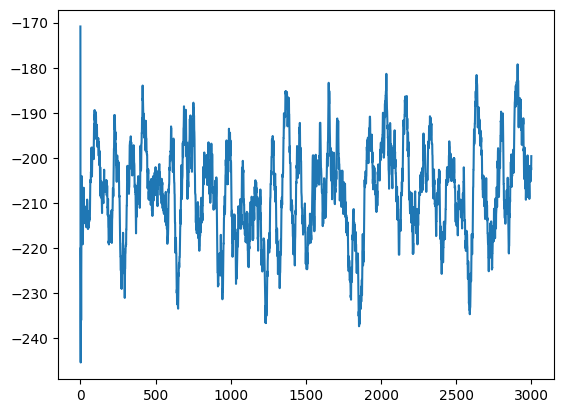

In [52]:
plt.plot(avg_reward_list)

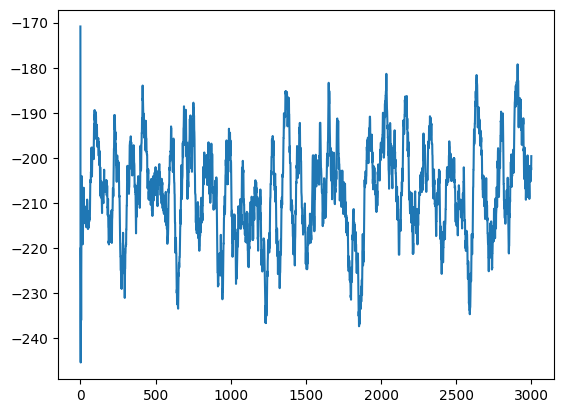

In [53]:
plt.plot(reward_ddpg_pg, label='DDPG+PG')

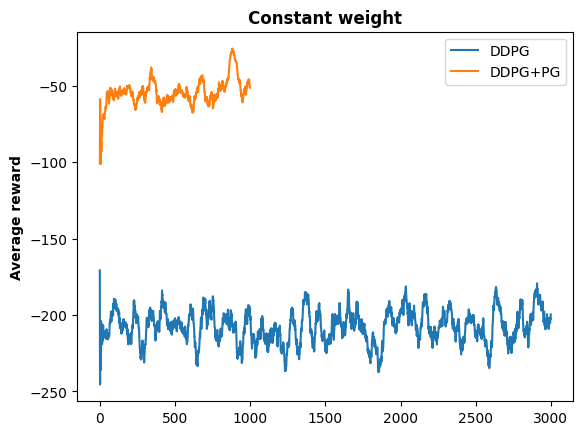

In [57]:
np.save('Reward_DDPG_CW.npy', avg_reward_list)
reward_ddpg_pg = np.load('Reward_DDPG_PG_CW.npy')
plt.plot(avg_reward_list, label='DDPG')
plt.plot(reward_ddpg_pg, label='DDPG+PG')
plt.ylabel('Episodes', fontweight='bold');
plt.ylabel('Average reward', fontweight='bold');
plt.title('Constant weight', fontweight='bold')

plt.legend()
plt.show()

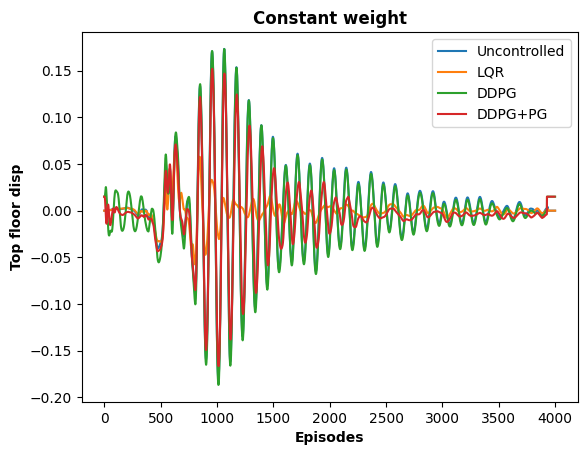

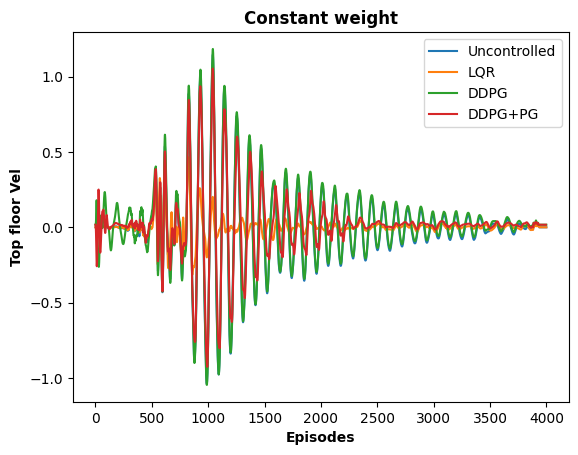

In [58]:
plt.figure()
plt.plot(xo[:, 7, 3], label='Uncontrolled')
plt.plot(xp[:, 7, 3], label='LQR')
plt.plot(ep_State_list[:, 7, 991]+0.015, label='DDPG')
Disp7_ddpg_pg = np.load('Disp7_DDPG_PG_CW.npy')
plt.plot(Disp7_ddpg_pg+0.015, label='DDPG+PG')
plt.xlabel('Episodes', fontweight='bold');
plt.ylabel('Top floor disp', fontweight='bold');
plt.title('Constant weight', fontweight='bold')

plt.legend()
plt.show()

# LA04
plt.figure()
plt.plot(xo[:, 15, 3], label='Uncontrolled')
plt.plot(xp[:, 15, 3], label='LQR')
plt.plot(ep_State_list[:, 15, 991]+0.017, label='DDPG')
Vel7_ddpg_pg = np.load('Vel7_DDPG_PG_CW.npy')
plt.plot(Vel7_ddpg_pg+0.017, label='DDPG+PG')

plt.xlabel('Episodes', fontweight='bold');
plt.ylabel('Top floor Vel', fontweight='bold');
plt.title('Constant weight', fontweight='bold')

plt.legend()
plt.show()

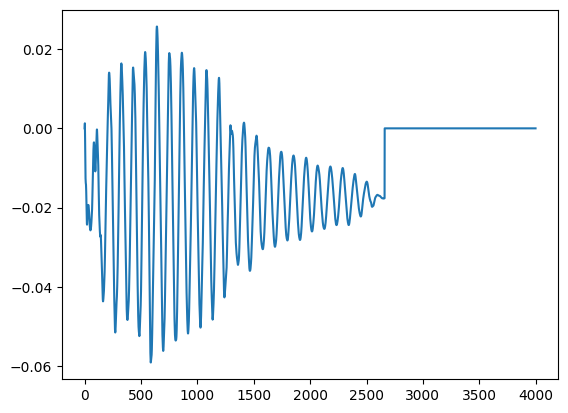

In [136]:
plt.plot(ep_State_list[:, 0, 400])

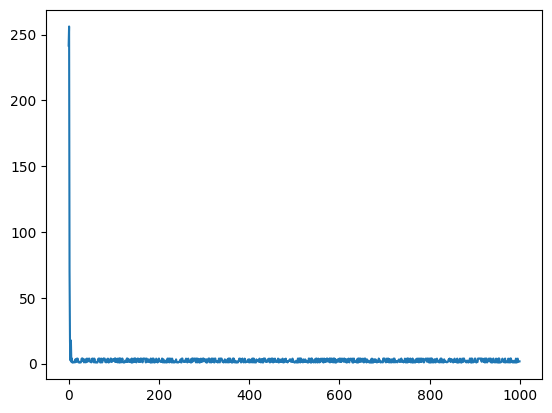

In [315]:
plt.plot(ep_Jval_list)

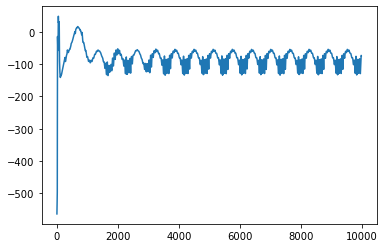

In [ ]:
plt.plot(actions[99])

In [ ]:
plt.plot(actions[498])

IndexError: list index out of range

In [ ]:
# Save the weights
actor_model.save_weights("qcar_actor.h5")
critic_model.save_weights("qcar_critic.h5")

target_actor.save_weights("qcar_target_actor.h5")
target_critic.save_weights("qcar_target_critic.h5")

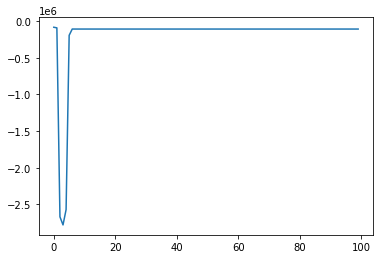

In [ ]:
plt.plot(ep_reward_list)


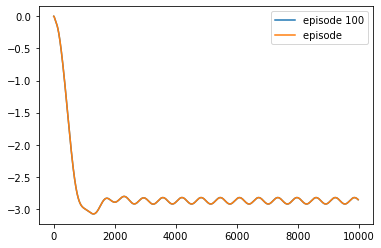

In [ ]:

plt.plot(values[30][0][0],label='episode 100')
plt.plot(values[99][0][0],label='episode ')
 
plt.legend()
plt.show()

In [ ]:
plt.plot(env.hr)

In [ ]:
plt.plot(J_values)

In [ ]:
plt.plot(ep_reward_list)


In [ ]:
plt.plot(actions[149])

In [ ]:
plt.plot(actions[145])

In [ ]:
plt.plot(actions[141])